In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg

import torch
import torch.nn
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms

In [2]:
# 손글씨 데이터 셋
D = torchvision.datasets.MNIST('dataset', train=True, download=True,
                               transform=torchvision.transforms.Compose(
                                   [ torchvision.transforms.ToTensor() ]
                                   )
                               )

100%|██████████| 9912422/9912422 [00:00<00:00, 142249092.44it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 66667965.78it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 112967843.79it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12959543.38it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [3]:
sample, label = D[92]
print(sample.shape)
print(label)

torch.Size([1, 28, 28])
4


torch.float32
torch.Size([1, 28, 28])


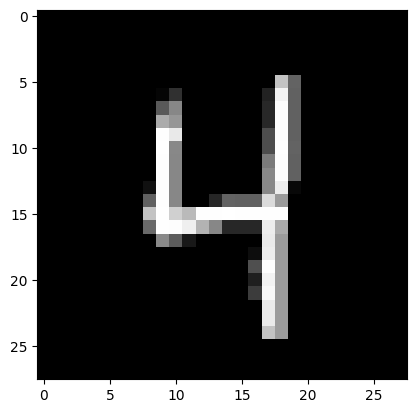

In [4]:
fig = plt.figure()
ax = plt.axes()

print(sample.dtype)
print(sample.shape)
ax.imshow(sample[0], cmap='gray')
plt.show()

## conv layer 실험하기

In [6]:
conv2d = torch.nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1)
# in_channels(필터두께), out_channels : 입출력 수
# kernel_size : 필터크기
# stride : 옮길 칸의 수

In [7]:
conv2d.weight

Parameter containing:
tensor([[[[-0.1092,  0.2681,  0.1872],
          [-0.1232, -0.0199,  0.1236],
          [ 0.0246,  0.1289, -0.1049]]],


        [[[-0.2493, -0.2017,  0.1282],
          [-0.1161,  0.2980,  0.1602],
          [-0.2652,  0.2365, -0.2562]]],


        [[[-0.2544,  0.2343,  0.2324],
          [ 0.1386,  0.2181,  0.1538],
          [ 0.0703,  0.3273,  0.0809]]]], requires_grad=True)

In [ ]:
conv2d.weight.shape

(3, 1, 3, 3)


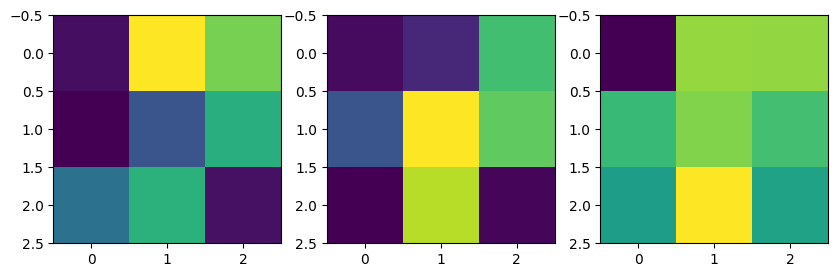

In [8]:
# conv2d.weight는 계산그래프에 붙어있기 때문에 detach()로 때내고 넘파이로 만들어야 함
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=3)

w = conv2d.weight.detach().numpy()
print(w.shape)
ax[0].imshow(w[0,0])
ax[1].imshow(w[1,0])
ax[2].imshow(w[2,0])
plt.show()

In [9]:
conv2d.bias

Parameter containing:
tensor([ 0.0253, -0.2870, -0.3151], requires_grad=True)

In [11]:
# 이미지 한장을 미니배치 스타일로 바꾼다.
sample_batched = sample.reshape(1, *sample.shape)
sample_batched.shape
# torch.Size([1, 1, 28, 28]) -> 맨앞은 N, 나머지(1, 28, 28)은 D

torch.Size([1, 1, 28, 28])

In [12]:
conv_out = conv2d(sample_batched)
conv_out.shape

torch.Size([1, 3, 26, 26])

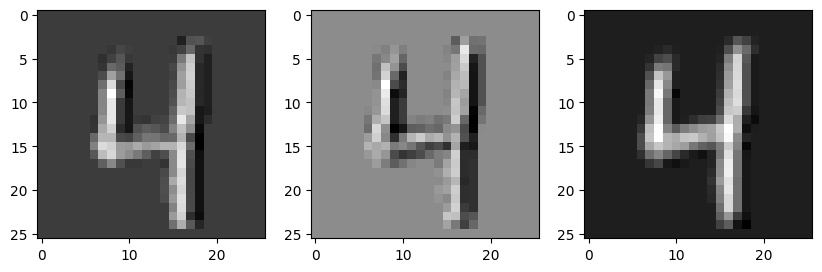

In [13]:
fig, ax =  plt.subplots(figsize=(10,5), nrows=1, ncols=3)

ax[0].imshow(conv_out[0][0].detach().numpy(), 'gray')
ax[1].imshow(conv_out[0][1].detach().numpy(), 'gray')
ax[2].imshow(conv_out[0][2].detach().numpy(), 'gray')

plt.show()

## 인위적인 필터를 이용한 conv

In [14]:
conv2d.weight.data = torch.tensor(
       [[[[2.0, 0.0, -2.0],
          [2.0, 0.0, -2.0],
          [2.0, 0.0, -2.0]]],
        [[[ 2.0,  2.0,  2.0],
          [ 0.0,  0.0,  0.0],
          [-2.0, -2.0, -2.0]]],
        [[[ 0.0, -1.0, 0.0],
          [ -1.0, 4.0, -1.0],
          [ 0.0, -1.0, 0.0]]]]
 )

conv2d.bias.data = torch.tensor([0.0,  0.0, 0.0])

(3, 1, 3, 3)


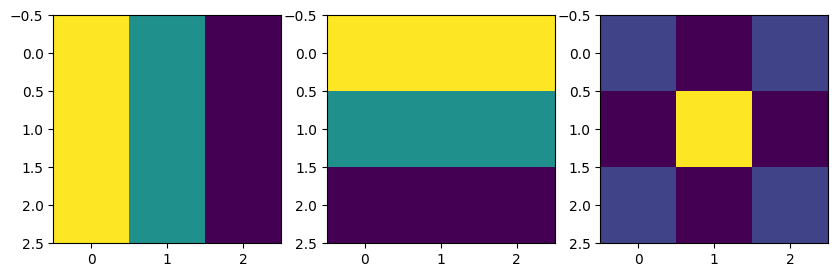

In [15]:
# conv2d.weight는 계산그래프에 붙어있기 때문에 detach()로 때내고 넘파이로 만들어야 함
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=3)

w = conv2d.weight.detach().numpy()
print(w.shape)
ax[0].imshow(w[0,0])
ax[1].imshow(w[1,0])
ax[2].imshow(w[2,0])
plt.show()

In [16]:
conv_out = conv2d(sample_batched)
conv_out.shape

torch.Size([1, 3, 26, 26])

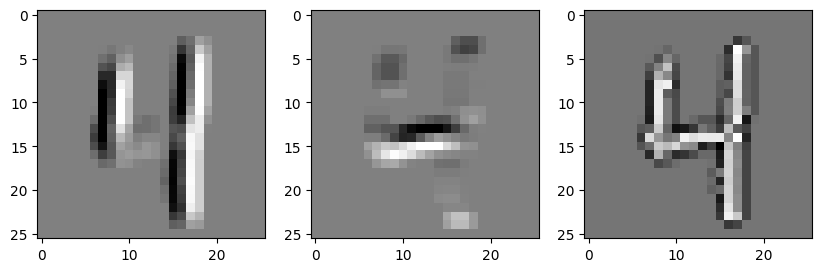

In [17]:
fig, ax =  plt.subplots(figsize=(10,5), nrows=1, ncols=3)

ax[0].imshow(conv_out[0][0].detach().numpy(), 'gray')
ax[1].imshow(conv_out[0][1].detach().numpy(), 'gray')
ax[2].imshow(conv_out[0][2].detach().numpy(), 'gray')

plt.show()

- 첫번째 세로방향 필터
  - 사진의 세로부분을 주로 추출
- 두번째 가로방향 필터
  - 사진의 가로부분을 주로 추출
- 마지막 십자모양 필터
  - 사진의 엣지부분 추출

## activation

In [18]:
# import torch.nn.functional as F

act_conv_out = F.relu(conv_out)
act_conv_out.shape

torch.Size([1, 3, 26, 26])

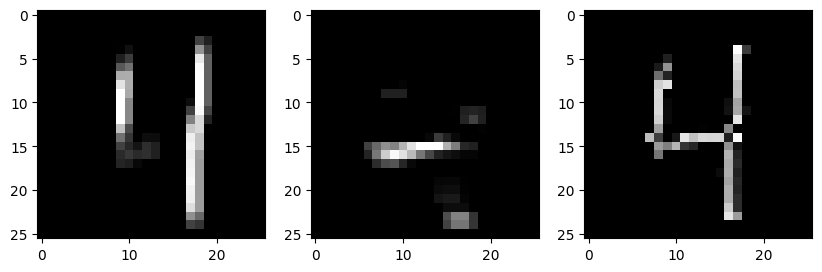

In [19]:
fig, ax =  plt.subplots(figsize=(10,5), nrows=1, ncols=3)

ax[0].imshow(act_conv_out[0][0].detach().numpy(), 'gray')
ax[1].imshow(act_conv_out[0][1].detach().numpy(), 'gray')
ax[2].imshow(act_conv_out[0][2].detach().numpy(), 'gray')

plt.show()

## max pooling

In [20]:
pooled_act_conv_out = F.max_pool2d(act_conv_out, kernel_size=2)
pooled_act_conv_out.shape

torch.Size([1, 3, 13, 13])

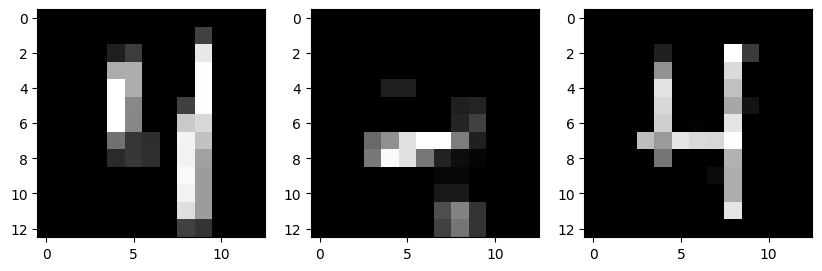

In [21]:
fig, ax =  plt.subplots(figsize=(10,5), nrows=1, ncols=3)

ax[0].imshow(pooled_act_conv_out[0][0].detach().numpy(), 'gray')
ax[1].imshow(pooled_act_conv_out[0][1].detach().numpy(), 'gray')
ax[2].imshow(pooled_act_conv_out[0][2].detach().numpy(), 'gray')

plt.show()

- 이미지 사이즈 26 -> 13